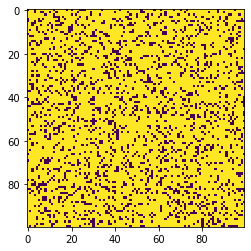

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update(frameNum, img, grid, N):
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            total = (grid[i, (j-1)%N] + grid[i, (j+1)%N] + 
                     grid[(i-1)%N, j] + grid[(i+1)%N, j] + 
                     grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] + 
                     grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255
            if grid[i, j]  == 255:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = 0
            else:
                if total == 3:
                    newGrid[i, j] = 255
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

N = 100
grid = np.random.choice([0, 255], (N, N), p=[0.2, 0.8]).astype(np.uint8)

fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N),
                              frames = 10,
                              interval=50,
                              save_count=50)
plt.show()
